# Data-driven control of complex network
Based on Baggio, G., Bassett, D.S et. al. paper [3]

$x(t+1) = Ax(t) + bu(t)$  
$y(t) = Cx(t)$  
$u^*_{0:T-1} = argmin_{u_{0:T-1}}\ y^{T}_{1:T-1}Qy_{1:T-1}\ +\ u^{T}_{0:T-1}Ru_{1:T-1}$  
$\hat{u}_{0:T-1} = U_{0:T-1}\ (I - K_{Y_T}(L_K{Y_T})^{\dagger}L) T^{\dagger}_Ty_f$  


$\hat{u}_{0:T-1} = (Y_TU_{0:T-1}^{\dagger})^{\dagger}y_f$  
$\hat{u}_{0:T-1} = U_{0:T-1}Y_T^{\dagger}y_f$

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

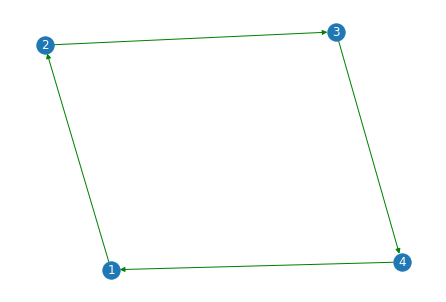

In [82]:
n = 4
G = nx.DiGraph()
G.add_edges_from([(i, (i + 1)) for i in range(1, n)] + [(4, 1)])

nx.draw(G, with_labels=True, font_color="white", edge_color="g")
plt.show()

A = np.array([[0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0],[0, 0, 1, 0]])
B = np.array([[1], [0], [0], [0]])

In [83]:
T = 10
N = 10

U = np.random.uniform(size=(T, N)) * 10 - 5
Y = np.zeros((n * T, N))
x0 = np.array([1, 2, 3, 4])
wT = np.array([4, 3, 2, 1])
Y[0:n] = np.array([wT for _ in range(N)]).T

for t in range(1, T):
    Y[n * t:n * (t + 1)] = np.dot(A, Y[n * (t - 1):n * t]) + B * U[t]
    
Y_piv = np.linalg.pinv(Y[-n:])
U_hat = np.dot(np.dot(U, Y_piv), wT)
U_hat


array([ 1.5774972 , -0.42378835,  0.21276567, -3.33233732, -0.38943265,
        1.58188309,  1.        ,  2.        ,  3.        ,  4.        ])

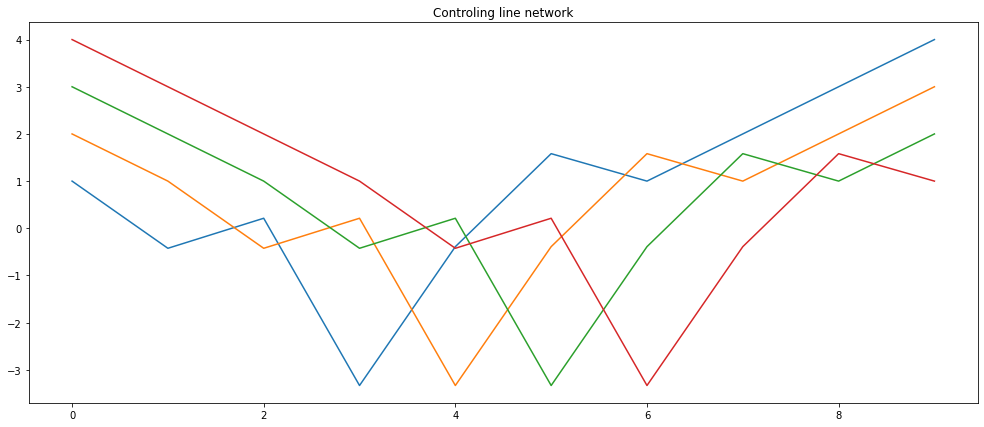

In [84]:
y = np.zeros((T, n))
y[0] = x0

for t in range(1, T):
    y[t] = np.dot(A, y[t - 1]) + B.T * U_hat[t]
    
plt.figure(figsize=(17, 7))
plt.title(f"Controling line network")
plt.plot(y)
plt.show()

In [86]:
np.round(np.dot(U, Y_piv), 4)

array([[-0.1972,  0.3495,  0.6965, -0.075 ],
       [-0.0872, -0.2679,  0.5602, -0.3917],
       [ 0.2532,  0.143 , -0.631 ,  0.0327],
       [ 0.1422, -0.5702, -0.7539, -0.6827],
       [ 0.1205, -0.2207, -0.1832,  0.157 ],
       [ 0.4202,  0.0876, -0.0376, -0.2865],
       [-0.    , -0.    , -0.    ,  1.    ],
       [-0.    , -0.    ,  1.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    , -0.    ],
       [ 1.    , -0.    , -0.    , -0.    ]])

## References
[1] Baggio, G., Bassett, D.S. & Pasqualetti, F. (2021) "_Data-driven control of complex networks._" Nat Commun 12, 1429 . https://doi.org/10.1038/s41467-021-21554-0